## Board Game Played Games with Rankings

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.spatial.distance import pdist

from itertools import combinations

In [9]:
csv_file_path = "DFL Game Ratings - Sheet1 - JAN2025.csv"

In [126]:
cols_to_use = [0, 2, 3, 4, 5]

In [128]:
df = pd.read_csv(csv_file_path, header=0, usecols=cols_to_use, index_col=None)

In [130]:
df.head()

,Game,Date,Dennis,Fabiano,Luke
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,10.0,9.0
1,Destinies,10-Aug-2022,6.0,5.0,7.0
2,Rajas of the Ganges,11-Aug-2022,9.0,7.0,7.5
3,Dog Lover,11-Aug-2022,6.5,7.0,6.5
4,The Crew: Mission Deep Sea,13-Aug-2022,7.0,8.0,8.5


In [132]:
df.tail()

,Game,Date,Dennis,Fabiano,Luke
1078,NaN,NaN,NaN,NaN,NaN
1079,NaN,NaN,NaN,NaN,NaN
1080,NaN,NaN,NaN,NaN,NaN
1081,NaN,NaN,NaN,NaN,NaN
1082,NaN,NaN,NaN,NaN,NaN


In [134]:
df = df.dropna(how='all')

In [136]:
df.tail()

,Game,Date,Dennis,Fabiano,Luke
441,Oathsworn: Into the Deepwood,22-Oct-2024,7.5,7.0,8.0
442,Creature Caravan,23-Oct-2024,8.0,7.0,7.5
443,Illiterati,23-Oct-2024,8.5,7.5,7.4
444,Phoenix New Horizon,30-Oct-2024,7.0,7.0,7.6
445,Endeavor: Deep Sea,7-Jan-2025,NaN,NaN,7.7


In [139]:
df_temp = df.head()

In [141]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Game     5 non-null      object 
 1   Date     5 non-null      object 
 2   Dennis   5 non-null      float64
 3   Fabiano  5 non-null      float64
 4   Luke     5 non-null      float64
dtypes: float64(3), object(2)
memory usage: 240.0+ bytes


In [143]:
df['Average'] = df[['Dennis', 'Fabiano', 'Luke']].mean(axis=1)

In [146]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,10.0,9.0,9.000000
1,Destinies,10-Aug-2022,6.0,5.0,7.0,6.000000
2,Rajas of the Ganges,11-Aug-2022,9.0,7.0,7.5,7.833333
3,Dog Lover,11-Aug-2022,6.5,7.0,6.5,6.666667
4,The Crew: Mission Deep Sea,13-Aug-2022,7.0,8.0,8.5,7.833333


In [148]:
# Extract year and month from the date (assuming dd-mmm-yyyy format)
df['Year-Month'] = pd.to_datetime(df['Date'], format='%d-%b-%Y').dt.strftime('%Y-%m')


In [150]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,10.0,9.0,9.000000,2022-08
1,Destinies,10-Aug-2022,6.0,5.0,7.0,6.000000,2022-08
2,Rajas of the Ganges,11-Aug-2022,9.0,7.0,7.5,7.833333,2022-08
3,Dog Lover,11-Aug-2022,6.5,7.0,6.5,6.666667,2022-08
4,The Crew: Mission Deep Sea,13-Aug-2022,7.0,8.0,8.5,7.833333,2022-08


In [152]:
# Group by year-month, sort by average rating (descending), and get the first game (highest average)
top_games_per_month = df.groupby('Year-Month')['Average'].apply(
    lambda x: x.sort_values(ascending=False).index[0]
)

# Merge with original DataFrame to get game names based on index
top_games_df = df.loc[top_games_per_month.values]

In [154]:
top_games_df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,10.0,9.0,9.000000,2022-08
12,Planet Unknown,13-Sep-2022,8.5,7.5,8.0,8.000000,2022-09
27,So Clover!,8-Oct-2022,8.0,8.5,8.5,8.333333,2022-10
53,Teotihuacan: City of Gods,30-Nov-2022,7.5,7.5,8.5,7.833333,2022-11
54,7 Wonders,8-Dec-2022,7.0,10.0,9.0,8.666667,2022-12


In [156]:
# Print the DataFrame showing top games per month (including year)
print(top_games_df[['Game', 'Year-Month']])  # Select only Game and Year-Month columns

                                         Game Year-Month
0    Clank! Legacy: Acquisitions Incorporated    2022-08
12                             Planet Unknown    2022-09
27                                 So Clover!    2022-10
53                  Teotihuacan: City of Gods    2022-11
54                                  7 Wonders    2022-12
72                                 So Clover!    2023-01
85                    The Search for Planet X    2023-02
100                         Mechs vs. Minions    2023-03
114                         Mechs vs. Minions    2023-04
139                            Project: ELITE    2023-05
158                         Mechs vs. Minions    2023-06
175                         Mechs vs. Minions    2023-07
184                            Project: ELITE    2023-08
201                         Mechs vs. Minions    2023-09
212                         Mechs vs. Minions    2023-10
230                               Cross Clues    2023-11
258                            

In [158]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,10.0,9.0,9.000000,2022-08
1,Destinies,10-Aug-2022,6.0,5.0,7.0,6.000000,2022-08
2,Rajas of the Ganges,11-Aug-2022,9.0,7.0,7.5,7.833333,2022-08
3,Dog Lover,11-Aug-2022,6.5,7.0,6.5,6.666667,2022-08
4,The Crew: Mission Deep Sea,13-Aug-2022,7.0,8.0,8.5,7.833333,2022-08


In [160]:
df['Game'].value_counts()

Game
Pandemic Legacy: Season 2    19
My City                      18
Pandemic Legacy: Season 1    15
Cross Clues                  14
The Initiative               14
                             ..
Truffle Shuffle               1
Spicy                         1
That's a Question!            1
Metro                         1
Endeavor: Deep Sea            1
Name: count, Length: 254, dtype: int64

In [162]:
# game_name_counts = df['Game'].value_counts()
game_name_counts = df['Game'].value_counts().sort_index(ascending=True)

# Print all elements without truncation
print(game_name_counts.to_string())

Game
7 Wonders                                       1
7 Wonders: Architects                           1
A Message From the Stars                        4
AI Space Puzzle                                 2
Adrenaline                                      1
Aeon's End                                      1
Aeon's End: Legacy                              8
Akropolis                                       1
Almost Innocent                                 5
Anomia                                          1
Apiary                                          1
Aquatica                                        2
Arcana Rising                                   1
Astra                                           2
Atlantis Rising (Second Edition)                1
Avatar: The Last Airbender – Aang's Destiny     1
Bad Company                                     1
Beyond the Sun                                  1
Bites                                           1
Books of Time                                

In [164]:
print(df['Game'].value_counts().to_string())

Game
Pandemic Legacy: Season 2                      19
My City                                        18
Pandemic Legacy: Season 1                      15
Cross Clues                                    14
The Initiative                                 14
Mechs vs. Minions                              10
Sleeping Gods                                   8
Aeon's End: Legacy                              8
The Crew: Mission Deep Sea                      8
Illiterati                                      7
Almost Innocent                                 5
Space Base: The Emergence of Shy Pluto          5
Destinies                                       5
So Clover!                                      5
A Message From the Stars                        4
Vagrantsong                                     4
Project: ELITE                                  4
Oathsworn: Into the Deepwood                    4
DUOS                                            4
Secret Identity                              

In [166]:
# Extract year or month from the date (assuming dd-mmm-yyyy format)
# Choose year ('%Y') or month ('%m') based on your desired granularity
df['Time Period'] = pd.to_datetime(df['Date'], format='%d-%b-%Y').dt.strftime('%Y')  # Adjust format if needed


In [168]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month,Time Period
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,10.0,9.0,9.000000,2022-08,2022
1,Destinies,10-Aug-2022,6.0,5.0,7.0,6.000000,2022-08,2022
2,Rajas of the Ganges,11-Aug-2022,9.0,7.0,7.5,7.833333,2022-08,2022
3,Dog Lover,11-Aug-2022,6.5,7.0,6.5,6.666667,2022-08,2022
4,The Crew: Mission Deep Sea,13-Aug-2022,7.0,8.0,8.5,7.833333,2022-08,2022


In [170]:
# Count games by time period
games_per_period = df.groupby('Time Period')['Game'].count()


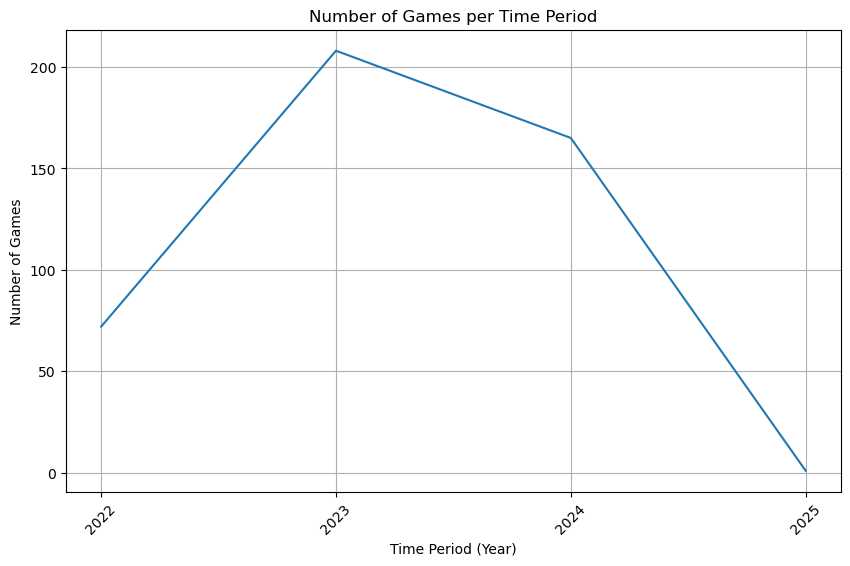

In [172]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.plot(games_per_period.index, games_per_period.values)
plt.xlabel('Time Period (Year)')  # Adjust label based on chosen format ('Year' or 'Month')
plt.ylabel('Number of Games')
plt.title('Number of Games per Time Period')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
plt.grid(True)

# Show the plot
plt.show()

In [174]:
# Extract month from the date (assuming dd-mmm-yyyy format)
df['Month'] = pd.to_datetime(df['Date'], format='%d-%b-%Y').dt.month_name()


In [176]:
# Count games by month
games_per_month = df.groupby('Month')['Game'].count()


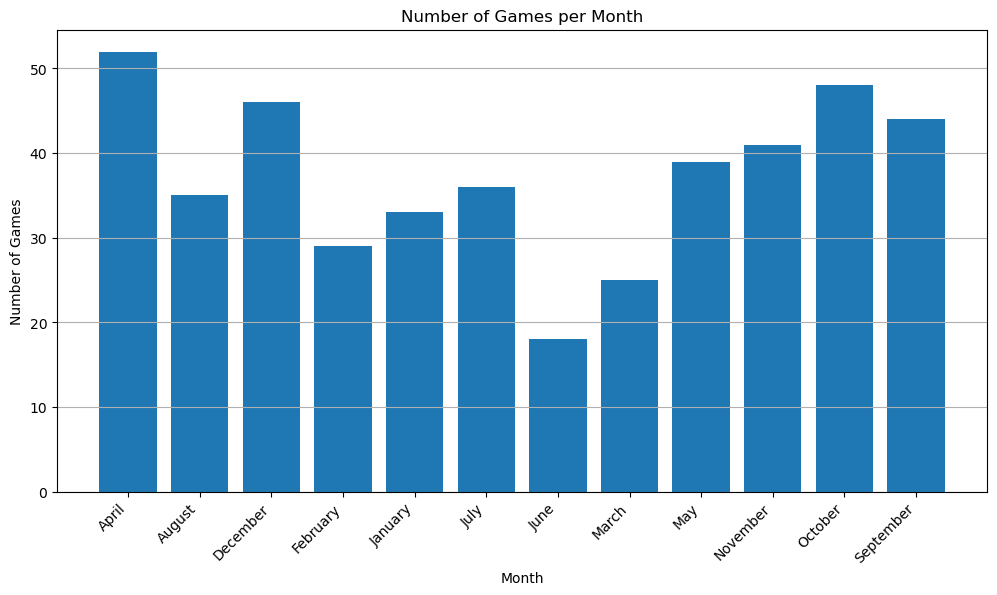

In [178]:
# Create the plot (adjust figure size as desired)
plt.figure(figsize=(12, 6))

# Use bar chart for monthly data
plt.bar(games_per_month.index, games_per_month.values)

# Customize labels and title
plt.xlabel('Month')
plt.ylabel('Number of Games')
plt.title('Number of Games per Month')

# Rotate x-axis labels if needed for readability
plt.xticks(rotation=45, ha='right')  # Right-align rotated labels

# Grid on y-axis
plt.grid(axis='y')

# Show the plot
plt.show()

In [180]:
# Extract year and month from the date (assuming dd-mmm-yyyy format)
df['Year-Month'] = pd.to_datetime(df['Date'], format='%d-%b-%Y').dt.strftime('%Y-%m')


In [182]:
# Count games by year-month
games_per_year_month = df.groupby('Year-Month')['Game'].count()

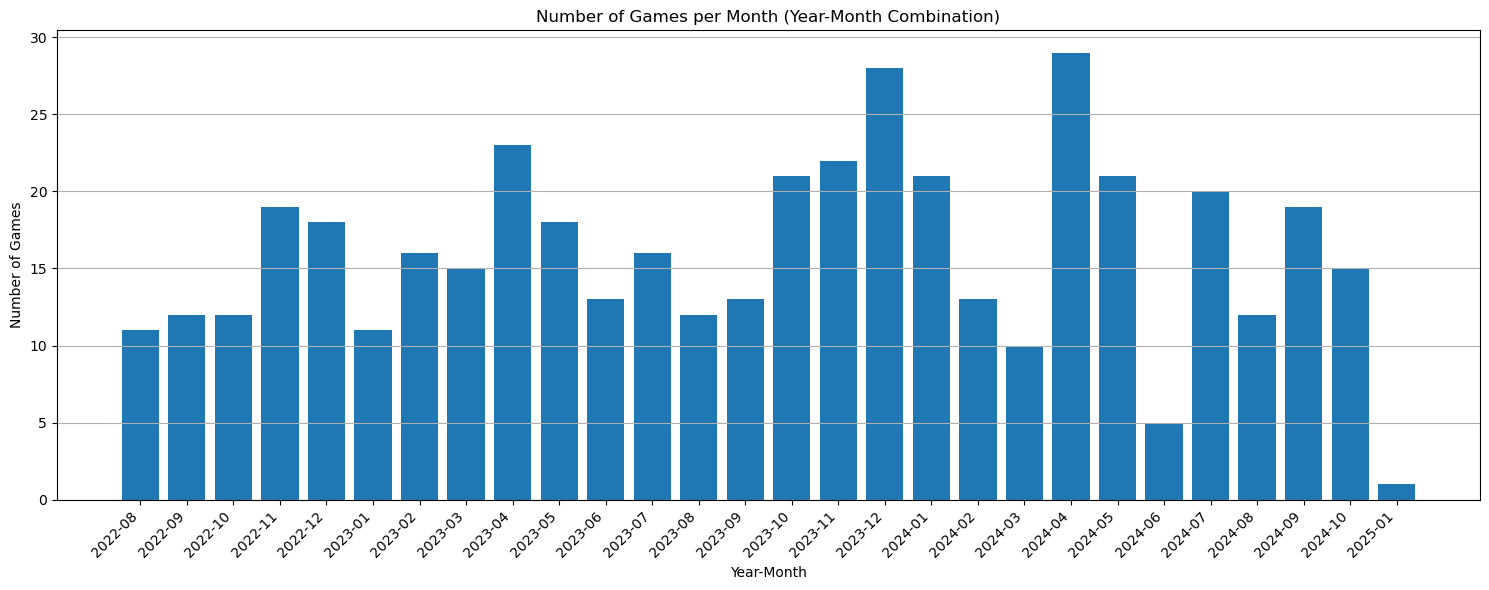

In [184]:
# Create the plot (adjust figure size as desired)
plt.figure(figsize=(15, 6))  # Adjust based on the number of months

# Use bar chart for monthly data
plt.bar(games_per_year_month.index, games_per_year_month.values)

# Customize labels and title
plt.xlabel('Year-Month')
plt.ylabel('Number of Games')
plt.title('Number of Games per Month (Year-Month Combination)')

# Rotate x-axis labels if needed for readability (optional)
plt.xticks(rotation=45, ha='right')  # Uncomment if needed

# Grid on y-axis
plt.grid(axis='y')

# Show the plot with potentially long x-axis labels
plt.tight_layout()  # Adjust layout to prevent overlapping elements

# Show the plot
plt.show()

In [186]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month,Time Period,Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,10.0,9.0,9.000000,2022-08,2022,August
1,Destinies,10-Aug-2022,6.0,5.0,7.0,6.000000,2022-08,2022,August
2,Rajas of the Ganges,11-Aug-2022,9.0,7.0,7.5,7.833333,2022-08,2022,August
3,Dog Lover,11-Aug-2022,6.5,7.0,6.5,6.666667,2022-08,2022,August
4,The Crew: Mission Deep Sea,13-Aug-2022,7.0,8.0,8.5,7.833333,2022-08,2022,August


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 445
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Game         446 non-null    object 
 1   Date         446 non-null    object 
 2   Dennis       445 non-null    float64
 3   Fabiano      443 non-null    float64
 4   Luke         446 non-null    float64
 5   Average      446 non-null    float64
 6   Year-Month   446 non-null    object 
 7   Time Period  446 non-null    object 
 8   Month        446 non-null    object 
dtypes: float64(4), object(5)
memory usage: 51.0+ KB


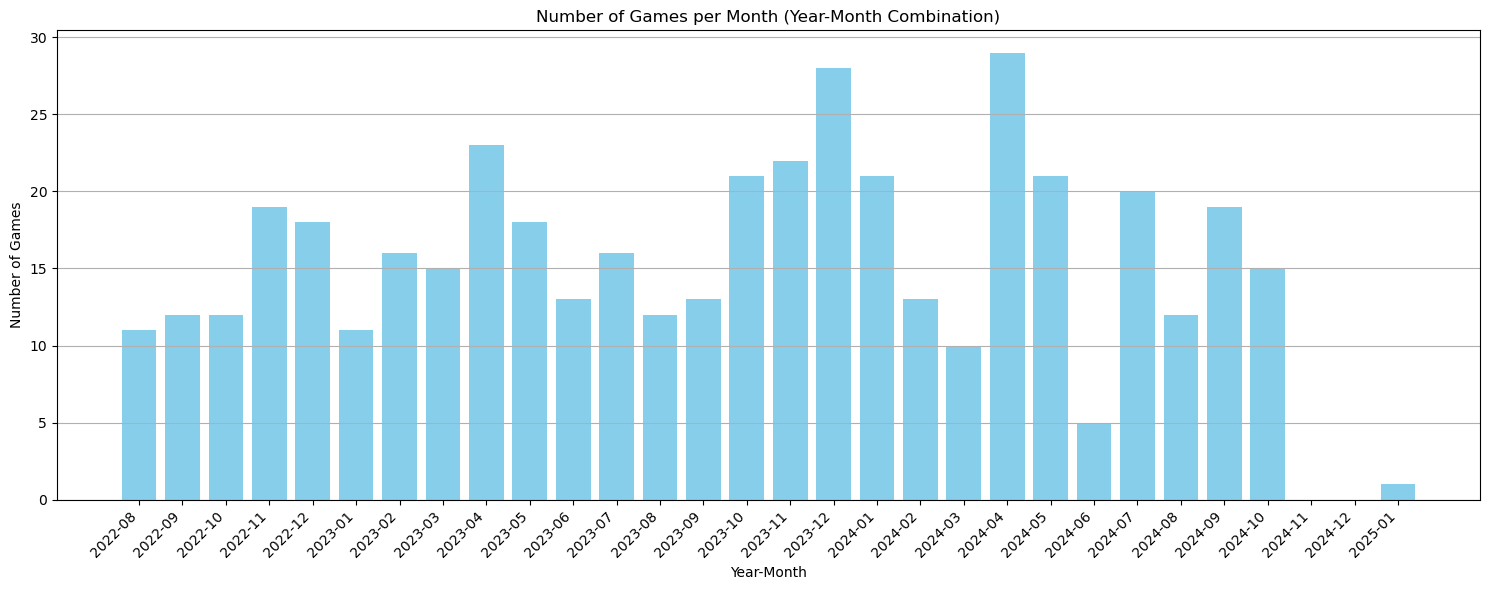

In [191]:
# Sample DataFrame for demonstration
# df should be your original DataFrame with 'Year-Month' and 'Game' columns
# df = pd.DataFrame({'Year-Month': [...], 'Game': [...]})

# Convert 'Year-Month' to datetime objects
df['Year-Month'] = pd.to_datetime(df['Year-Month'], format='%Y-%m')

# Count games by year-month
games_per_year_month = df.groupby('Year-Month')['Game'].count()

# Create a DataFrame with all Year-Month combinations
all_year_months = pd.date_range(start=games_per_year_month.index.min(), end=games_per_year_month.index.max(), freq='MS')

# Convert to DataFrame to align with your original Series structure
all_year_months_df = pd.DataFrame({'Year-Month': all_year_months})

# Reindex the Series to include all Year-Month combinations and fill missing values with 0
games_per_year_month = games_per_year_month.reindex(all_year_months, fill_value=0)

# Create the plot (adjust figure size as desired)
plt.figure(figsize=(15, 6))  # Adjust based on the number of months

# Use bar chart for monthly data
plt.bar(games_per_year_month.index.strftime('%Y-%m'), games_per_year_month.values, color='skyblue')

# Customize labels and title
plt.xlabel('Year-Month')
plt.ylabel('Number of Games')
plt.title('Number of Games per Month (Year-Month Combination)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Grid on y-axis
plt.grid(axis='y')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()


In [193]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month,Time Period,Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,10.0,9.0,9.000000,2022-08-01,2022,August
1,Destinies,10-Aug-2022,6.0,5.0,7.0,6.000000,2022-08-01,2022,August
2,Rajas of the Ganges,11-Aug-2022,9.0,7.0,7.5,7.833333,2022-08-01,2022,August
3,Dog Lover,11-Aug-2022,6.5,7.0,6.5,6.666667,2022-08-01,2022,August
4,The Crew: Mission Deep Sea,13-Aug-2022,7.0,8.0,8.5,7.833333,2022-08-01,2022,August


In [195]:
df[['Game', 'Dennis']]

,Game,Dennis
0,Clank! Legacy: Acquisitions Incorporated,8.0
1,Destinies,6.0
2,Rajas of the Ganges,9.0
3,Dog Lover,6.5
4,The Crew: Mission Deep Sea,7.0
...,...,...
441,Oathsworn: Into the Deepwood,7.5
442,Creature Caravan,8.0
443,Illiterati,8.5
444,Phoenix New Horizon,7.0


In [198]:
def get_top_10_games(df, player_name):
  """
  This function takes a DataFrame and a player name as input.
  The DataFrame is assumed to have separate rating columns for each player 
  (e.g., 'Player 1 Rating', 'Player 2 Rating'). It returns the top games for 
  the specified player based on their highest rating for each unique game.

  Args:
      df (pandas.DataFrame): The DataFrame containing game data 
                             with separate player rating columns.
      player_name (str): The name of the player for whom to find top games.

  Returns:
      pandas.DataFrame: A DataFrame containing the top games for the 
                        specified player, sorted by their highest rating.
  """

  # Select columns containing game and the specified player's rating
  player_data = df.loc[:,['Game', player_name]]

  # Rename the player rating column for clarity (optional)
  player_data.rename(columns={player_name: f'{player_name} Rating'}, inplace=True)

  # Group by game and select the row with the maximum rating for each game
  top_games_per_player = player_data.groupby('Game')[f'{player_name} Rating'].max().reset_index()

  # Sort by player's rating (descending) and select top 10 (or all if less than 10)
  top_games = top_games_per_player.sort_values(by=f'{player_name} Rating', ascending=False)
  return top_games.head(10)


In [200]:
get_top_10_games(df, 'Dennis')

,Game,Dennis Rating
121,Monikers,10.0
222,The Search for Planet X,9.5
118,"Message From the Stars, A",9.5
25,Caution Signs,9.5
114,Marvel United: Return of the Sinister Six,9.5
213,The Castles of Burgundy,9.5
31,Comic Hunters,9.5
101,King of Monster Island,9.5
233,Turing Machine,9.5
158,Project: ELITE,9.5


In [202]:
get_top_10_games(df, 'Fabiano')


,Game,Fabiano Rating
0,7 Wonders,10.0
121,Monikers,10.0
29,Clank! Legacy: Acquisitions Incorporated,10.0
2,A Message From the Stars,9.0
136,Obscurio,9.0
158,Project: ELITE,9.0
54,Don't Mess with Cthulhu,9.0
199,Stella: Dixit Universe,9.0
118,"Message From the Stars, A",9.0
236,Unusual Suspects,8.5


In [204]:
get_top_10_games(df, 'Luke')


,Game,Luke Rating
0,7 Wonders,9.0
222,The Search for Planet X,9.0
116,Mechs vs. Minions,9.0
29,Clank! Legacy: Acquisitions Incorporated,9.0
158,Project: ELITE,9.0
206,Teotihuacan: City of Gods,8.5
193,Space Base,8.5
143,Orléans,8.5
220,The Morrison Game Factory,8.5
26,Century: Golem Edition,8.5


In [208]:
# Select columns containing game and the specified player's rating
player_name = "Luke"  # Replace with the player name of interest
player_data = df[['Game', player_name]]

In [210]:
player_data.head()

,Game,Luke
0,Clank! Legacy: Acquisitions Incorporated,9.0
1,Destinies,7.0
2,Rajas of the Ganges,7.5
3,Dog Lover,6.5
4,The Crew: Mission Deep Sea,8.5


In [212]:
# Group data by game and find the maximum rating for each game
top_games_per_player = player_data.groupby('Game')[f'{player_name}'].max().reset_index()
top_games_per_player

,Game,Luke
0,7 Wonders,9.0
1,7 Wonders: Architects,7.0
2,A Message From the Stars,8.0
3,AI Space Puzzle,7.5
4,Adrenaline,7.0
...,...,...
249,Wonderland's War,7.0
250,Word Slam,6.6
251,World Wonders,7.6
252,Your Best Life,7.4


In [214]:
# Sort by player's rating (descending) and select top 10 (or all if less than 10)
top_games = top_games_per_player.sort_values(by=f'{player_name}', ascending=False)
top_games = top_games.head(10)  # Select top 10 (adjust for all if needed)

top_games  # Print the top games DataFrame

,Game,Luke
0,7 Wonders,9.0
222,The Search for Planet X,9.0
116,Mechs vs. Minions,9.0
29,Clank! Legacy: Acquisitions Incorporated,9.0
158,Project: ELITE,9.0
206,Teotihuacan: City of Gods,8.5
193,Space Base,8.5
143,Orléans,8.5
220,The Morrison Game Factory,8.5
26,Century: Golem Edition,8.5


In [216]:
def get_top_10_plus_games(df, player_name):
  """
  This function takes a DataFrame and a player name as input.
  The DataFrame is assumed to have separate rating columns for each player 
  (e.g., 'Player 1 Rating', 'Player 2 Rating'). It returns the top games for 
  the specified player based on their highest rating for each unique game, 
  ensuring all games with the same rating at the 10th position (or later) 
  are included.

  Args:
      df (pandas.DataFrame): The DataFrame containing game data 
                             with separate player rating columns.
      player_name (str): The name of the player for whom to find top games.

  Returns:
      pandas.DataFrame: A DataFrame containing the top games for the 
                        specified player, sorted by their highest rating.
  """

  # Select columns containing game and the specified player's rating
  player_data = df.loc[:,['Game', player_name]]

  # Rename the player rating column for clarity (optional)
  player_data.rename(columns={player_name: f'{player_name}'}, inplace=True)

  # Group by game and select the row with the maximum rating for each game
  top_games_per_player = player_data.groupby('Game')[f'{player_name}'].max().reset_index()

  # Sort by player's rating (descending)
  top_games = top_games_per_player.sort_values(by=f'{player_name}', ascending=False)

  # Find the rating at the 10th position (or lower if fewer than 10 games)
  top_10th_rating = top_games.iloc[min(9, len(top_games) - 1), top_games.columns.get_loc(f'{player_name}')]

  # Filter games with rating equal to or higher than the 10th position
  top_games = top_games[top_games[f'{player_name}'] >= top_10th_rating]

  # Reset index and assign ranking (1 to n)
  top_games = top_games.reset_index(drop=True).assign(Rank=range(1, len(top_games) + 1))

  # Set 'Rank' as the index
  top_games = top_games.set_index('Rank')

  return top_games


In [218]:
get_top_10_plus_games(df, 'Dennis')

,Game,Dennis
Rank,,
1,Monikers,10.0
2,The Search for Planet X,9.5
3,"Message From the Stars, A",9.5
4,Caution Signs,9.5
5,Marvel United: Return of the Sinister Six,9.5
6,The Castles of Burgundy,9.5
7,Comic Hunters,9.5
8,King of Monster Island,9.5
9,Turing Machine,9.5


In [220]:
get_top_10_plus_games(df, 'Fabiano')

,Game,Fabiano
Rank,,
1,7 Wonders,10.0
2,Monikers,10.0
3,Clank! Legacy: Acquisitions Incorporated,10.0
4,A Message From the Stars,9.0
5,Obscurio,9.0
6,Project: ELITE,9.0
7,Don't Mess with Cthulhu,9.0
8,Stella: Dixit Universe,9.0
9,"Message From the Stars, A",9.0


In [222]:
get_top_10_plus_games(df, 'Luke')

,Game,Luke
Rank,,
1,7 Wonders,9.0
2,The Search for Planet X,9.0
3,Mechs vs. Minions,9.0
4,Clank! Legacy: Acquisitions Incorporated,9.0
5,Project: ELITE,9.0
6,Teotihuacan: City of Gods,8.5
7,Space Base,8.5
8,Orléans,8.5
9,The Morrison Game Factory,8.5


In [224]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month,Time Period,Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,10.0,9.0,9.000000,2022-08-01,2022,August
1,Destinies,10-Aug-2022,6.0,5.0,7.0,6.000000,2022-08-01,2022,August
2,Rajas of the Ganges,11-Aug-2022,9.0,7.0,7.5,7.833333,2022-08-01,2022,August
3,Dog Lover,11-Aug-2022,6.5,7.0,6.5,6.666667,2022-08-01,2022,August
4,The Crew: Mission Deep Sea,13-Aug-2022,7.0,8.0,8.5,7.833333,2022-08-01,2022,August


In [226]:
get_top_10_plus_games(df, 'Average')

,Game,Average
Rank,,
1,Project: ELITE,9.166667
2,Clank! Legacy: Acquisitions Incorporated,9.000000
3,Mechs vs. Minions,8.833333
4,"Message From the Stars, A",8.833333
5,The Search for Planet X,8.833333
6,So Clover!,8.666667
7,A Message From the Stars,8.666667
8,7 Wonders,8.666667
9,Cross Clues,8.500000


In [228]:
df[df['Game']=='King of Monster Island']

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month,Time Period,Month
214,King of Monster Island,11-Oct-2023,9.0,7.0,7.3,7.766667,2023-10-01,2023,October
215,King of Monster Island,11-Oct-2023,9.0,7.0,7.3,7.766667,2023-10-01,2023,October
326,King of Monster Island,3-Apr-2024,9.5,7.5,7.3,8.100000,2024-04-01,2024,April


In [230]:
players = ['Dennis', 'Fabiano', 'Luke']


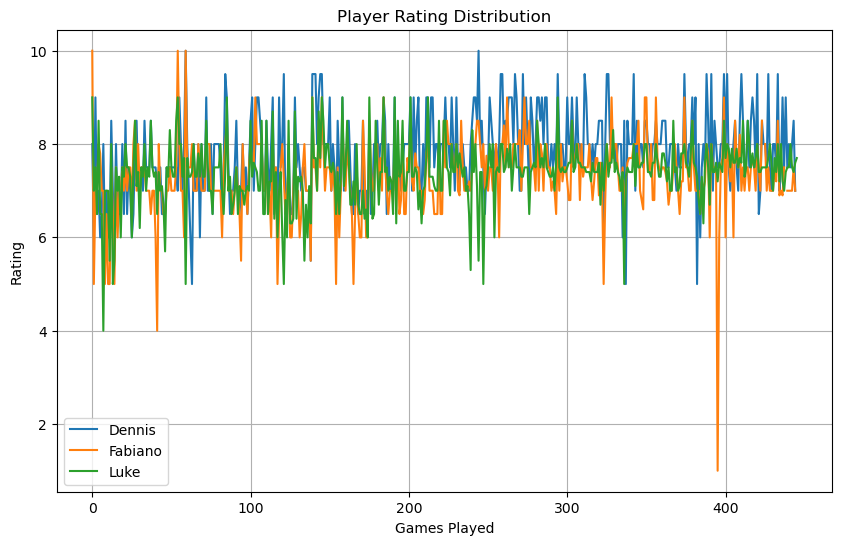

In [232]:
# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired

for player in players:
    plt.plot(df[player], label=player)

# Add labels and title
plt.xlabel('Games Played')
plt.ylabel('Rating')
plt.title('Player Rating Distribution')

# Add legend to differentiate player lines
plt.legend()

# Show the plot
plt.grid(True)  # Optional: Add gridlines
plt.show()

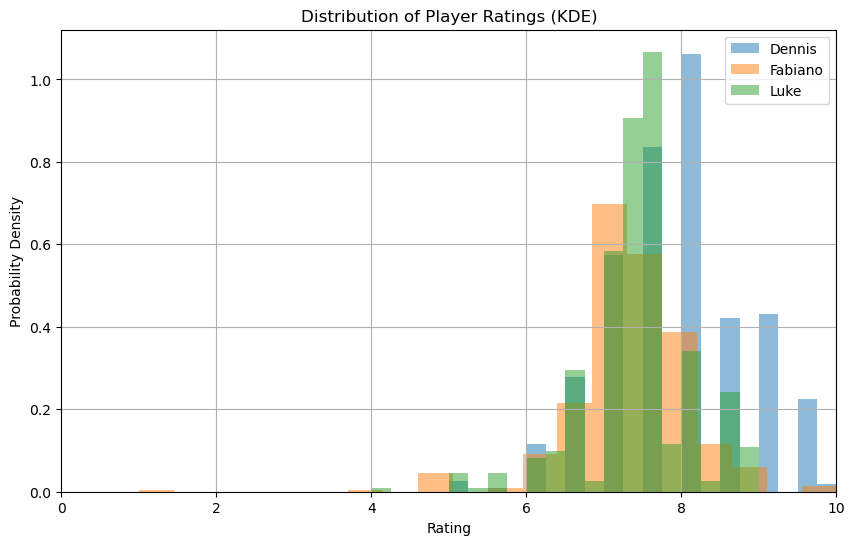

In [234]:
# Define a list of player names (assuming these exist in your DataFrame)
players = ['Dennis', 'Fabiano', 'Luke']  # Adjust player names as needed

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired

# Loop through players and plot KDE
for player in players:
  # Extract ratings for the current player
  ratings = df[player]

  # Use KDE to estimate the probability density
  density = plt.hist(ratings, density=True, bins=20, alpha=0.5, label=player)  # Adjust bins for smoothness

  # Adjust x-axis limits to 0-10 (assuming ratings are within this range)
  plt.xlim(0, 10)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Probability Density')
plt.title('Distribution of Player Ratings (KDE)')

# Add legend to differentiate players
plt.legend()

# Show the plot
plt.grid(True)  # Optional: Add gridlines
plt.show()


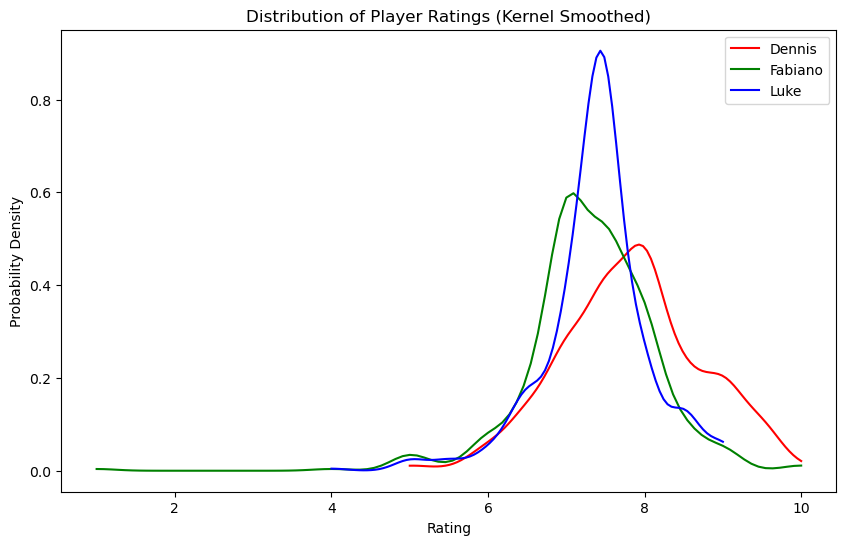

In [236]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired

players = ['Dennis', 'Fabiano', 'Luke'] 
colors = ['red', 'green', 'blue']

# Loop through players and plot smoothed distribution
for i, player in enumerate(players):
  # Extract ratings for the current player
  ratings = df[player].dropna() # need to drop for gaussian_kde

  # Use kernel smoothing to estimate the density
  density = stats.gaussian_kde(ratings)  # Gaussian kernel
  x = np.linspace(min(ratings), max(ratings), 100)  # Range and number of points
  y = density(x)  # Evaluate density at points

  # Plot the smoothed curve
  plt.plot(x, y, label=player, color=colors[i])

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Probability Density')
plt.title('Distribution of Player Ratings (Kernel Smoothed)')
plt.legend()

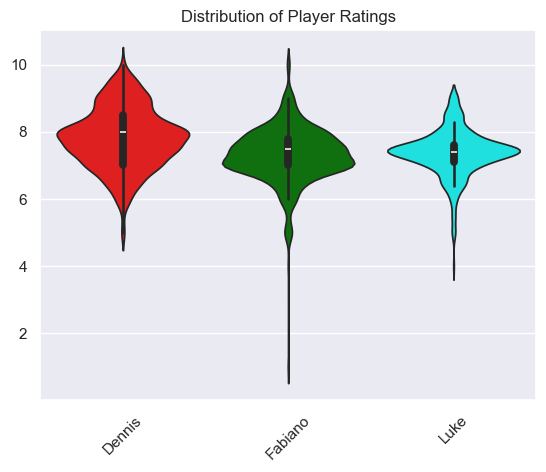

In [238]:

# Define a list of player names (assuming these exist in your DataFrame)
players = ['Dennis', 'Fabiano', 'Luke']  # Adjust player names as needed
custom_palette = ['red', 'green', 'cyan']

# Create the violin plot
sns.set_theme(style="darkgrid")  # Optional: Set theme for aesthetics

# Create a violin plot with hue for players
sns.violinplot(
    data=df[players],
    palette=custom_palette
)

# Rotate x labels to prevent overlapping (optional)
plt.xticks(rotation=45)  # You can adjust the rotation angle

# Add title
plt.title('Distribution of Player Ratings')

# Show the plot
plt.show()


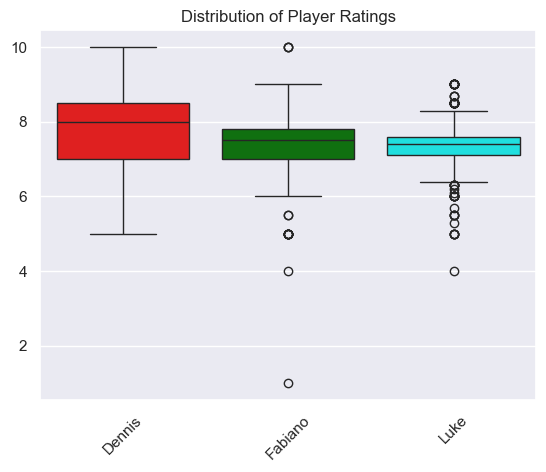

In [240]:
# Create a custom color list
custom_palette = ['red', 'green', 'cyan']

# Create a box plot with hue for players
# sns.boxplot(data = df[players])
sns.boxplot(
    data=df[players],
    palette=custom_palette
)


# Rotate x labels to prevent overlapping (optional)
plt.xticks(rotation=45)  # You can adjust the rotation angle

# Add title
plt.title('Distribution of Player Ratings')

# Show the plot
plt.show()


In [243]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month,Time Period,Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,10.0,9.0,9.000000,2022-08-01,2022,August
1,Destinies,10-Aug-2022,6.0,5.0,7.0,6.000000,2022-08-01,2022,August
2,Rajas of the Ganges,11-Aug-2022,9.0,7.0,7.5,7.833333,2022-08-01,2022,August
3,Dog Lover,11-Aug-2022,6.5,7.0,6.5,6.666667,2022-08-01,2022,August
4,The Crew: Mission Deep Sea,13-Aug-2022,7.0,8.0,8.5,7.833333,2022-08-01,2022,August


In [246]:
def top_10_games(df, player1, player2, num_games=10):
    # Check if the player columns exist in the dataframe
    if player1 not in df.columns or player2 not in df.columns:
        raise ValueError(f"One or both player names {player1}, {player2} are not in the dataframe")
    
    # Create a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()
    
    # Calculate the average rating for the two specified players
    df_copy['AverageRating'] = df_copy[[player1, player2]].mean(axis=1)
    
    # Group by 'Game' and calculate the mean of 'AverageRating'
    avg_rating_per_game = df_copy.groupby('Game')['AverageRating'].mean().reset_index()
    
    # Sort the games by average rating in descending order and get the top 10
    top_n_games = avg_rating_per_game.sort_values(by='AverageRating', ascending=False).head(num_games)

    # Reset the index of the resulting dataframe
    top_n_games.reset_index(drop=True, inplace=True)
    
    return top_n_games



In [248]:
top_10_games(df, 'Dennis', 'Fabiano')

,Game,AverageRating
0,Monikers,9.625000
1,"Message From the Stars, A",9.250000
2,Project: ELITE,9.187500
3,Infiltraitors,9.000000
4,Clank! Legacy: Acquisitions Incorporated,9.000000
5,A Message From the Stars,8.812500
6,The Castles of Burgundy,8.750000
7,The Search for Planet X,8.750000
8,Cross Clues,8.660714
9,Hive Mind,8.625000


In [250]:
df.head()

,Game,Date,Dennis,Fabiano,Luke,Average,Year-Month,Time Period,Month
0,Clank! Legacy: Acquisitions Incorporated,3-Aug-2022,8.0,10.0,9.0,9.000000,2022-08-01,2022,August
1,Destinies,10-Aug-2022,6.0,5.0,7.0,6.000000,2022-08-01,2022,August
2,Rajas of the Ganges,11-Aug-2022,9.0,7.0,7.5,7.833333,2022-08-01,2022,August
3,Dog Lover,11-Aug-2022,6.5,7.0,6.5,6.666667,2022-08-01,2022,August
4,The Crew: Mission Deep Sea,13-Aug-2022,7.0,8.0,8.5,7.833333,2022-08-01,2022,August


In [252]:
top_10_games(df, 'Dennis', 'Luke')

,Game,AverageRating
0,The Search for Planet X,9.125000
1,Project: ELITE,9.125000
2,Mechs vs. Minions,8.830000
3,"Message From the Stars, A",8.750000
4,Cross Clues,8.660714
5,So Clover!,8.650000
6,Just One,8.625000
7,Turing Machine,8.600000
8,Caution Signs,8.600000
9,Comic Hunters,8.550000


In [254]:
top_10_games(df, 'Fabiano', 'Luke')

,Game,AverageRating
0,7 Wonders,9.5000
1,Clank! Legacy: Acquisitions Incorporated,9.5000
2,Project: ELITE,8.9375
3,The Search for Planet X,8.6250
4,Mechs vs. Minions,8.5050
5,"Message From the Stars, A",8.5000
6,Decrypto,8.5000
7,So Clover!,8.4500
8,A Message From the Stars,8.4375
9,Stella: Dixit Universe,8.2500


In [256]:
def euclidean_distance_between_players(df):
    players = df.columns[2:5]  # Assuming the first two columns are 'Game' and 'Date'
    num_players = len(players)
    distance_matrix = pd.DataFrame(np.zeros((num_players, num_players)), index=players, columns=players)

    for i in range(num_players):
        for j in range(i+1, num_players):
            player1 = players[i]
            player2 = players[j]
            
            # Select the rows where both players have non-NaN ratings
            valid_ratings = df[[player1, player2]].dropna()
            
            # Ensure ratings are numeric
            valid_ratings = valid_ratings.apply(pd.to_numeric, errors='coerce').dropna()
            
            # Calculate the Euclidean distance only if there are valid ratings
            if not valid_ratings.empty:
                distance = np.linalg.norm(valid_ratings[player1] - valid_ratings[player2])
            else:
                distance = np.nan  # If no valid ratings, distance is not defined
            
            # Fill the distance matrix (symmetric)
            distance_matrix.at[player1, player2] = distance
            distance_matrix.at[player2, player1] = distance
    
    return distance_matrix



In [258]:
distance_matrix = euclidean_distance_between_players(df)
print(distance_matrix)

            Dennis    Fabiano       Luke
Dennis    0.000000  21.224396  20.553102
Fabiano  21.224396   0.000000  17.103362
Luke     20.553102  17.103362   0.000000


In [282]:
def top_10_games_of_year(df, year):
    df_year = df[df['Year-Month'].dt.year == 2024]
    top_games_2024 = df_year.sort_values(by='Average', ascending=False)
    print(top_games_2024[['Game', 'Average']].head(10))

In [284]:
top_10_games_of_year(df, 2024)

                          Game   Average
399             Project: ELITE  9.000000
374  Message From the Stars, A  8.833333
294    The Search for Planet X  8.833333
379                 So Clover!  8.666667
303                 So Clover!  8.666667
281                 So Clover!  8.666667
433   A Message From the Stars  8.666667
388                Cross Clues  8.500000
391                Cross Clues  8.500000
356   A Message From the Stars  8.500000


In [306]:
def top_10_games_of_year_2(df, year):
    # Filter the DataFrame for the given year
    df_year = df[df['Year-Month'].dt.year == year]
    
    # Group by 'Game' and take the highest average score for each game
    df_year = df_year.groupby('Game').agg({'Average': 'max'}).reset_index()
    
    # Sort by 'Average' in descending order and select the top 10 games
    top_games = df_year.sort_values(by='Average', ascending=False).head(10)
    
    # Determine the maximum length of the "Game" column
    max_len = top_games['Game'].str.len().max()
    pad_len = max_len + 5  # Add 5 spaces as a cushion
    
    # Justify the "Game" column to the left with dynamic padding and format header
    header = ["Game".ljust(pad_len), "Average"]
    rows = top_games.apply(lambda row: [row['Game'].ljust(pad_len), row['Average']], axis=1).tolist()
    
    # Print the formatted output
    print(f"{header[0]}  {header[1]}")
    for row in rows:
        print(f"{row[0]}  {row[1]:.2f}")




In [310]:
top_10_games_of_year_2(df, 2024)

Game                            Average
Project: ELITE                  9.00
Message From the Stars, A       8.83
The Search for Planet X         8.83
So Clover!                      8.67
A Message From the Stars        8.67
Cross Clues                     8.50
Don't Mess with Cthulhu         8.37
Caution Signs                   8.23
Things in Rings                 8.20
Infiltraitors                   8.20


In [318]:
def top_10_games_of_year_player(df, year, player=None):
    # Filter the DataFrame for the given year
    df_year = df[df['Year-Month'].dt.year == year]
    
    # Determine the column to rank by (player's rating or average)
    if player:
        # Group by 'Game' and take the highest rating for the specified player
        df_year = df_year.groupby('Game').agg({player: 'max'}).reset_index()
        # Sort by the player's rating in descending order
        top_games = df_year.sort_values(by=player, ascending=False).head(10)
        # Determine the maximum length of the "Game" column
        max_len = top_games['Game'].str.len().max()
        pad_len = max_len + 5  # Add 5 spaces as a cushion
        # Format the header and rows
        header = ["Game".ljust(pad_len), player]
        rows = top_games.apply(lambda row: [row['Game'].ljust(pad_len), row[player]], axis=1).tolist()
    else:
        # Group by 'Game' and take the highest average score for each game
        df_year = df_year.groupby('Game').agg({'Average': 'max'}).reset_index()
        # Sort by 'Average' in descending order
        top_games = df_year.sort_values(by='Average', ascending=False).head(10)
        # Determine the maximum length of the "Game" column
        max_len = top_games['Game'].str.len().max()
        pad_len = max_len + 5  # Add 5 spaces as a cushion
        # Format the header and rows
        header = ["Game".ljust(pad_len), "Average"]
        rows = top_games.apply(lambda row: [row['Game'].ljust(pad_len), row['Average']], axis=1).tolist()
    
    # Print the formatted output
    print(f"{header[0]}  {header[1]}")
    for row in rows:
        print(f"{row[0]}  {row[1]:.2f}")



In [322]:
top_10_games_of_year_player(df, 2024, player='Dennis') 

Game                                            Dennis
A Message From the Stars                        9.50
Project: ELITE                                  9.50
King of Monster Island                          9.50
Marvel United: Return of the Sinister Six       9.50
Message From the Stars, A                       9.50
Cross Clues                                     9.50
The Search for Planet X                         9.50
Caution Signs                                   9.50
Comic Hunters                                   9.50
Marvel United: X-Men                            9.00


In [324]:
top_10_games_of_year_player(df, 2024, player='Fabiano') 

Game                            Fabiano
A Message From the Stars        9.00
Don't Mess with Cthulhu         9.00
Message From the Stars, A       9.00
Project: ELITE                  9.00
So Clover!                      8.50
Things in Rings                 8.50
The LOOP                        8.20
The Taverns of Tiefenthal       8.00
First in Flight                 8.00
That's Not a Hat                8.00


In [326]:
top_10_games_of_year_player(df, 2024, player='Luke') 

Game                               Luke
The Search for Planet X            9.00
The Morrison Game Factory          8.50
Project: ELITE                     8.50
So Clover!                         8.50
Space Base                         8.50
Great Dalmuti, The                 8.30
A Message From the Stars           8.00
Cross Clues                        8.00
Oathsworn: Into the Deepwood       8.00
Return to Dark Tower               8.00


In [330]:
def top_10_games_of_year_player_2(df, year, player=None):
    # ANSI escape codes for bold and underlined text
    bold_underline = '\033[1m\033[4m'
    reset = '\033[0m'

    # Filter the DataFrame for the given year
    df_year = df[df['Year-Month'].dt.year == year]
    
    # Determine the column to rank by (player's rating or average)
    if player:
        # Group by 'Game' and take the highest rating for the specified player
        df_year = df_year.groupby('Game').agg({player: 'max'}).reset_index()
        # Sort by the player's rating in descending order
        top_games = df_year.sort_values(by=player, ascending=False).head(10)
        # Determine the maximum length of the "Game" column
        max_len = top_games['Game'].str.len().max()
        pad_len = max_len + 5  # Add 5 spaces as a cushion
        # Format the header and rows
        header = ["Game".ljust(pad_len), player]
        rows = top_games.apply(lambda row: [row['Game'].ljust(pad_len), row[player]], axis=1).tolist()
    else:
        # Group by 'Game' and take the highest average score for each game
        df_year = df_year.groupby('Game').agg({'Average': 'max'}).reset_index()
        # Sort by 'Average' in descending order
        top_games = df_year.sort_values(by='Average', ascending=False).head(10)
        # Determine the maximum length of the "Game" column
        max_len = top_games['Game'].str.len().max()
        pad_len = max_len + 5  # Add 5 spaces as a cushion
        # Format the header and rows
        header = ["Game".ljust(pad_len), "Average"]
        rows = top_games.apply(lambda row: [row['Game'].ljust(pad_len), row['Average']], axis=1).tolist()
    
    # Print the formatted output with bold and underlined headers
    print(f"{bold_underline}{header[0]}  {header[1]}{reset}")
    for row in rows:
        print(f"{row[0]}  {row[1]:.2f}")




In [332]:
top_10_games_of_year_player_2(df, 2024, player='Luke') 

Game                               Luke
The Search for Planet X            9.00
The Morrison Game Factory          8.50
Project: ELITE                     8.50
So Clover!                         8.50
Space Base                         8.50
Great Dalmuti, The                 8.30
A Message From the Stars           8.00
Cross Clues                        8.00
Oathsworn: Into the Deepwood       8.00
Return to Dark Tower               8.00


In [334]:
def top_10_new_games_of_year(df, year, player=None):
    # Convert 'Year-Month' to datetime if it's not already in datetime format
    if not pd.api.types.is_datetime64_any_dtype(df['Year-Month']):
        df['Year-Month'] = pd.to_datetime(df['Year-Month'], format='%Y-%m')

    # Filter the DataFrame to exclude games played in previous years
    previous_years = df[df['Year-Month'].dt.year < year]
    current_year = df[df['Year-Month'].dt.year == year]
    new_games = current_year[~current_year['Game'].isin(previous_years['Game'])]

    # Determine the column to rank by (player's rating or average)
    if player:
        # Group by 'Game' and take the highest rating for the specified player
        new_games = new_games.groupby('Game').agg({player: 'max'}).reset_index()
        # Sort by the player's rating in descending order
        top_games = new_games.sort_values(by=player, ascending=False).head(10)
        # Determine the maximum length of the "Game" column
        max_len = top_games['Game'].str.len().max()
        pad_len = max_len + 5  # Add 5 spaces as a cushion
        # Format the header and rows
        header = ["Game".ljust(pad_len), player]
        rows = top_games.apply(lambda row: [row['Game'].ljust(pad_len), row[player]], axis=1).tolist()
    else:
        # Group by 'Game' and take the highest average score for each game
        new_games = new_games.groupby('Game').agg({'Average': 'max'}).reset_index()
        # Sort by 'Average' in descending order
        top_games = new_games.sort_values(by='Average', ascending=False).head(10)
        # Determine the maximum length of the "Game" column
        max_len = top_games['Game'].str.len().max()
        pad_len = max_len + 5  # Add 5 spaces as a cushion
        # Format the header and rows
        header = ["Game".ljust(pad_len), "Average"]
        rows = top_games.apply(lambda row: [row['Game'].ljust(pad_len), row['Average']], axis=1).tolist()

    # ANSI escape codes for bold and underlined text
    bold_underline = '\033[1m\033[4m'
    reset = '\033[0m'

    # Print the formatted output with bold and underlined headers
    print(f"{bold_underline}{header[0]}  {header[1]}{reset}")
    for row in rows:
        print(f"{row[0]}  {row[1]:.2f}")




In [336]:
# Usage examples
top_10_new_games_of_year(df, 2024)  # Default: rank by average


Game                                            Average
Message From the Stars, A                       8.83
A Message From the Stars                        8.67
Caution Signs                                   8.23
Things in Rings                                 8.20
Infiltraitors                                   8.20
Marvel United: Return of the Sinister Six       8.17
The Morrison Game Factory                       8.17
Rush M.D.                                       8.17
The LOOP                                        8.13
Comic Hunters                                   8.03


In [338]:
top_10_new_games_of_year(df, 2024, player='Dennis')  

Game                                              Dennis
A Message From the Stars                          9.50
Caution Signs                                     9.50
Marvel United: Return of the Sinister Six         9.50
Comic Hunters                                     9.50
Message From the Stars, A                         9.50
Loony Quest                                       9.00
Marvel United: X-Men                              9.00
Avatar: The Last Airbender – Aang's Destiny       9.00
Infiltraitors                                     9.00
Rush M.D.                                         9.00


In [340]:
def top_10_new_games_of_year_2(df, year, player=None):
    # Convert 'Year-Month' to datetime if it's not already in datetime format
    if not pd.api.types.is_datetime64_any_dtype(df['Year-Month']):
        df['Year-Month'] = pd.to_datetime(df['Year-Month'], format='%Y-%m')

    # Filter the DataFrame to exclude games played in previous years
    previous_years = df[df['Year-Month'].dt.year < year]
    current_year = df[df['Year-Month'].dt.year == year]
    new_games = current_year[~current_year['Game'].isin(previous_years['Game'])]

    # Determine the column to rank by (player's rating or average)
    if player:
        # Group by 'Game' and take the highest rating for the specified player
        new_games = new_games.groupby('Game').agg({player: 'max'}).reset_index()
        # Sort by the player's rating in descending order
        top_games = new_games.sort_values(by=player, ascending=False)
        # Determine the maximum length of the "Game" column
        max_len = top_games['Game'].str.len().max()
        pad_len = max_len + 5  # Add 5 spaces as a cushion
        # Find the 10th game's rating
        tenth_rating = top_games.iloc[9][player] if len(top_games) > 9 else None
        # Select all games with ratings greater than or equal to the 10th game's rating
        top_games = top_games[top_games[player] >= (tenth_rating if tenth_rating is not None else float('-inf'))]
        # Format the header and rows
        header = ["Game".ljust(pad_len), player]
        rows = top_games.apply(lambda row: [row['Game'].ljust(pad_len), row[player]], axis=1).tolist()
    else:
        # Group by 'Game' and take the highest average score for each game
        new_games = new_games.groupby('Game').agg({'Average': 'max'}).reset_index()
        # Sort by 'Average' in descending order
        top_games = new_games.sort_values(by='Average', ascending=False)
        # Determine the maximum length of the "Game" column
        max_len = top_games['Game'].str.len().max()
        pad_len = max_len + 5  # Add 5 spaces as a cushion
        # Find the 10th game's average score
        tenth_rating = top_games.iloc[9]['Average'] if len(top_games) > 9 else None
        # Select all games with average scores greater than or equal to the 10th game's score
        top_games = top_games[top_games['Average'] >= (tenth_rating if tenth_rating is not None else float('-inf'))]
        # Format the header and rows
        header = ["Game".ljust(pad_len), "Average"]
        rows = top_games.apply(lambda row: [row['Game'].ljust(pad_len), row['Average']], axis=1).tolist()

    # ANSI escape codes for bold and underlined text
    bold_underline = '\033[1m\033[4m'
    reset = '\033[0m'

    # Print the formatted output with bold and underlined headers
    print(f"{bold_underline}{header[0]}  {header[1]}{reset}")
    for row in rows:
        print(f"{row[0]}  {row[1]:.2f}")



In [346]:
top_10_new_games_of_year_2(df, 2024, player='Dennis')  # Rank by Dennis' rating


Game                                              Dennis
A Message From the Stars                          9.50
Caution Signs                                     9.50
Marvel United: Return of the Sinister Six         9.50
Comic Hunters                                     9.50
Message From the Stars, A                         9.50
Loony Quest                                       9.00
Marvel United: X-Men                              9.00
Avatar: The Last Airbender – Aang's Destiny       9.00
Infiltraitors                                     9.00
Rush M.D.                                         9.00
Shadow Kingdoms of Valeria                        9.00


In [348]:
# Usage examples
top_10_new_games_of_year_2(df, 2024)  # Default: rank by average


Game                                              Average
Message From the Stars, A                         8.83
A Message From the Stars                          8.67
Caution Signs                                     8.23
Things in Rings                                   8.20
Infiltraitors                                     8.20
Marvel United: Return of the Sinister Six         8.17
The Morrison Game Factory                         8.17
Rush M.D.                                         8.17
The LOOP                                          8.13
Comic Hunters                                     8.03
